In [17]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pylab as pl

from sklearn.cluster import KMeans
import shapely.wkt as shpwkt

from sklearn.preprocessing import scale

In [2]:
DATA = '../data'

In [3]:
yelp = pd.read_csv(DATA + '/Yelp_Weights.csv', index_col=0)
yelp.head()

,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,36085000900,POLYGON ((-74.07920577013245 40.64343078374567...,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,36061009800,POLYGON ((-73.96432543478758 40.75638153099091...,4,3,4,4,3,4,0,0,...,1,0,0,1,0,1,4,2,1,2
2,36061010000,POLYGON ((-73.96802436915851 40.75957814005282...,4,3,4,3,4,4,0,0,...,1,0,0,1,0,1,4,3,1,2
3,36061010200,POLYGON ((-73.97124277307127 40.76093641847906...,4,3,4,4,4,4,0,0,...,1,0,0,2,0,1,3,2,1,1
4,36061010400,POLYGON ((-73.97445730550224 40.76229308352487...,4,3,4,4,4,4,0,0,...,0,1,0,1,0,1,3,2,1,2


In [4]:
X = yelp.iloc[:,8:]
X.head()

,Armenian,Cambodian,Caribbean,Chinese,Colombian,Cuban,Dominican,Filipino,French,German,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,2,3,0,1,0,0,3,2,...,1,0,0,1,0,1,4,2,1,2
2,0,0,2,2,0,1,0,0,3,1,...,1,0,0,1,0,1,4,3,1,2
3,0,0,2,2,0,3,0,0,4,1,...,1,0,0,2,0,1,3,2,1,1
4,0,0,1,1,0,3,1,0,4,0,...,0,1,0,1,0,1,3,2,1,2


In [5]:
# As an alternative, look for an elbow in the within-cluster SSE (k-means example):
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i, random_state=3391)
    res=km.fit(X)
    SSE.append(res.inertia_)
print(SSE)

[30855.402387615926, 27352.1713573364, 25702.574502694104, 24314.74186671409, 23192.658182658906, 22185.289527489997, 21440.053139450378, 20890.440043500217]


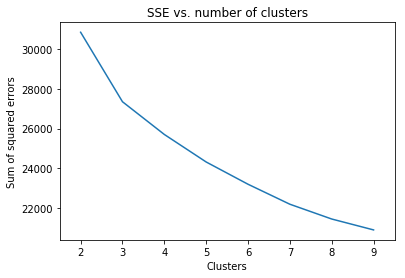

In [6]:
pl.gca()
pl.plot(range(2,10),SSE)
pl.xlabel("Clusters")
pl.ylabel("Sum of squared errors")
pl.title("SSE vs. number of clusters")
pl.xlim(1.5,9.5)
pl.show()

In [7]:
km = KMeans(random_state=3391,n_clusters=7)
res=km.fit(X)

In [8]:
res.labels_

array([1, 2, 2, ..., 4, 3, 1], dtype=int32)

In [9]:
yelp['label'] = res.labels_

In [10]:
rs =pd.DataFrame(km.transform(X))
rs = pd.concat((rs,pd.DataFrame(km.fit_predict(X))),axis=1)
rs.columns=list(range(7))+["cluster"]
yelp.loc[:,"score"]=rs.apply(lambda x: x[int(x["cluster"])],axis=1)

In [11]:
yelp.sort_values('score', ascending=False, inplace=True)
yelp.head()

,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,...,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese,label,score
1692,36081038301,POLYGON ((-73.83689970202342 40.76269811821739...,4,4,0,2,1,0,0,0,...,0,3,0,3,0,0,0,3,1,7.397145
2075,36061002700,POLYGON ((-73.99694730386304 40.71207168683073...,4,4,2,0,3,2,0,0,...,0,3,2,2,3,0,0,4,3,7.118645
460,36081028700,POLYGON ((-73.88764663725344 40.74724483937553...,3,3,1,3,3,1,0,0,...,2,0,0,0,4,0,0,0,3,6.977350
994,36081148300,POLYGON ((-73.73937598887052 40.77601366916728...,3,3,3,0,0,3,0,0,...,0,0,0,0,0,3,0,3,1,6.955162
1503,36061007500,POLYGON ((-74.00596018042596 40.73584500733544...,3,2,4,0,4,3,0,0,...,0,0,0,0,0,2,0,0,3,6.884555


In [13]:
yelp['geometry'] = yelp['geometry'].apply(lambda x: shpwkt.loads(x))

In [18]:
yelp = gpd.GeoDataFrame(yelp, geometry='geometry')
yelp.head()

,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,...,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese,label,score
1692,36081038301,POLYGON ((-73.83689970202342 40.76269811821739...,4,4,0,2,1,0,0,0,...,0,3,0,3,0,0,0,3,1,7.397145
2075,36061002700,POLYGON ((-73.99694730386304 40.71207168683073...,4,4,2,0,3,2,0,0,...,0,3,2,2,3,0,0,4,3,7.118645
460,36081028700,POLYGON ((-73.88764663725344 40.74724483937553...,3,3,1,3,3,1,0,0,...,2,0,0,0,4,0,0,0,3,6.977350
994,36081148300,POLYGON ((-73.73937598887052 40.77601366916728...,3,3,3,0,0,3,0,0,...,0,0,0,0,0,3,0,3,1,6.955162
1503,36061007500,POLYGON ((-74.00596018042596 40.73584500733544...,3,2,4,0,4,3,0,0,...,0,0,0,0,0,2,0,0,3,6.884555


In [53]:
colors = ['#738E5B', '#6BB2D6', '#FC917E', '#E5BA5E', '#8b8b8b', '#936991', '#726260']
from matplotlib.colors import LinearSegmentedColormap
cm = LinearSegmentedColormap.from_list(
        'Custom1', colors, N=7)

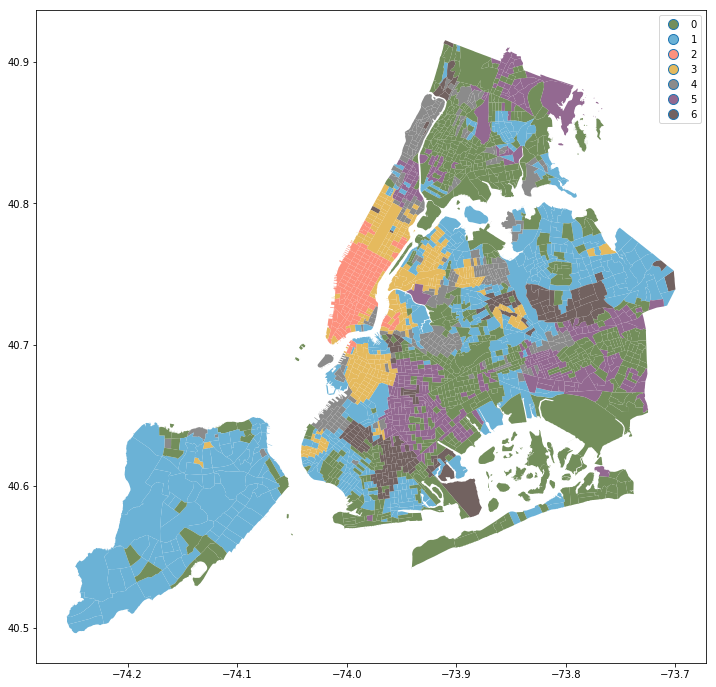

In [54]:
fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(111)
# ct_2010.plot(ax=ax, edgecolor='lightgray', color='white')
yelp.plot(ax=ax, column='label', cmap=cm, edgecolor=None, categorical=True, legend=True);

In [55]:
yelp['label'].value_counts()

0    643
1    460
5    321
3    241
4    228
6    153
2    120
Name: label, dtype: int64

In [61]:
yelp.groupby('label').mean().iloc[:,7:-1].T

label,0,1,2,3,4,5,6
Armenian,0.000000,0.019565,0.066667,0.000000,0.000000,0.000000,0.013072
Cambodian,0.009331,0.000000,0.275000,0.008299,0.013158,0.000000,0.000000
Caribbean,0.437014,0.143478,0.633333,0.651452,0.684211,2.411215,0.254902
Chinese,0.256610,1.356522,2.375000,1.572614,1.429825,0.828660,0.764706
Colombian,0.059098,0.176087,0.041667,0.485477,0.421053,0.015576,0.091503
Cuban,0.026439,0.019565,1.450000,0.443983,0.271930,0.046729,0.000000
Dominican,0.273717,0.145652,0.491667,0.659751,2.429825,0.376947,0.078431
Filipino,0.018663,0.073913,0.316667,0.261411,0.140351,0.080997,0.098039
French,0.021773,0.130435,3.041667,1.053942,0.192982,0.146417,0.019608
German,0.018663,0.130435,0.650000,0.331950,0.127193,0.012461,0.000000
